In [1]:
# xarray test 2
# conda: xesmfTools

import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

In [2]:
# Form a GFS url based on current time
utcNow = dt.datetime.utcnow() - dt.timedelta(days=1)

# Hour has to be 00, 06, 12 or 18
while not(utcNow.strftime("%H") in ['00', '06', '12', '18']):
    utcNow = utcNow - dt.timedelta(hours=1)

In [3]:
# Example URL format
# http://nomads.ncep.noaa.gov/dods/gfs_0p25_1hr/gfs20210328/gfs_0p25_1hr_12z
#                                                  %Y  %m%d              %H
# Go back one day to ensure we have a model run
gfsUrl = utcNow.strftime('http://nomads.ncep.noaa.gov/dods/gfs_0p25_1hr/gfs%Y%m%d/gfs_0p25_1hr_%Hz')

In [4]:
ds = xr.open_dataset(gfsUrl, chunks={'time': 1})

/home/cermak/miniconda3/envs/xesmfTools/lib/python3.7/site-packages/xarray/coding/times.py:113: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [6]:
# snodsfc
snodsfc     = ds.snodsfc.isel(time=0)
snodsfcFcst = ds.snodsfc.isel(time=120)

In [7]:
snodsfc     = snodsfc.where(snodsfc.lat >= 50.0)
snodsfcFcst = snodsfcFcst.where(snodsfcFcst.lat >= 50.0)
snoDiff     = (snodsfcFcst - snodsfc) * 39.3701

(170.0, 250.0)

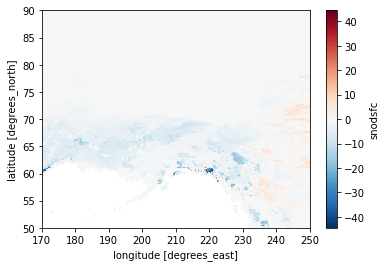

In [8]:
snoDiff.plot()
plt.ylim([50.0, 90.0])
plt.xlim([170.0, 250.0])

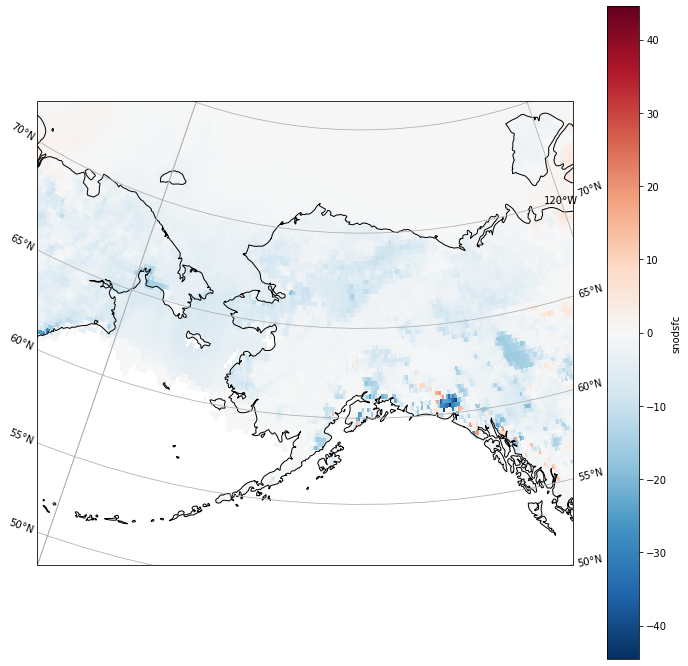

In [31]:
proj = ccrs.LambertConformal(central_longitude=-150, central_latitude=50)
fig = plt.figure(figsize=(12, 12))

p = snoDiff.plot(transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

for ax in [p.axes]:
    ax.set_extent([-181.0, -130.0, 50.0, 75.0])
    ax.gridlines(draw_labels=True)
    ax.coastlines()


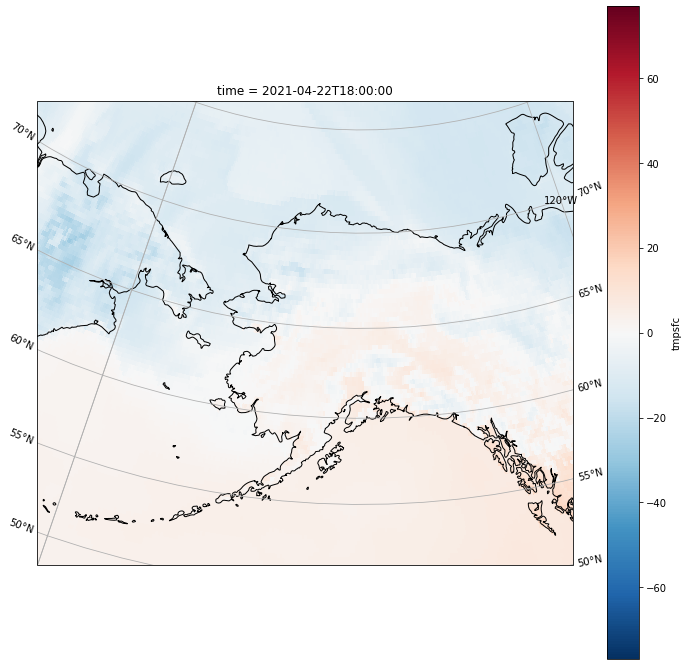

In [34]:
proj = ccrs.LambertConformal(central_longitude=-150, central_latitude=50)
fig = plt.figure(figsize=(12, 12))

# Convert to C
tsfc = ds.tmpsfc.isel(time=0) - 273.15
p = tsfc.plot(transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

for ax in [p.axes]:
    ax.set_extent([-181.0, -130.0, 50.0, 75.0])
    ax.gridlines(draw_labels=True)
    ax.coastlines()